In [1]:
from PyHugeGraph import PyHugeGraphClient
from helper.insert_data import insert_data
from helper.delete_data import delete_data
from helper.update_data import update_data
from helper.traversers import traversers
from helper.read_data import read_data
import matplotlib.pyplot as plt
import numpy as np

from helper import get_vertices_number

def mapping(l, key_1, key_2):
    return list(map(lambda x: x[key_1][key_2], l))


databases = ['node_10', 'node_100', 'node_1000', 'node_10000', 'node_100000', 'node_1000000']

In [3]:

import os
my_path = os.path.abspath(".")
print(my_path)

/home/admin1/Documents/uni/last_lambda/hugegraph/CompareGraphDatabases/main_code


In [4]:
def plot(title, x_labels, X_axis, time, option="vertices", database="node_10"):
    plt.figure(figsize=(10,10))
    plt.title(title)

    plt.xticks(X_axis, x_labels) #, rotation=45
    plt.bar(X_axis - 0.4, mapping(time, option, "min"), 0.4, label="min")
    plt.bar(X_axis, mapping(time, option, "mean"), 0.4, label="mean")
    plt.bar(X_axis + 0.4, mapping(time, option, "max"), 0.4, label="max")
    
    plt.savefig(my_path + "/plots/" + database + "/" + title + ".png")
    plt.legend()


In [5]:
def execute_database(database, large=True):
    hg = PyHugeGraphClient.HugeGraphClient("http://localhost", "8081", database)
    
    vertices = get_vertices_number(database, False)

    file = open(database + ".txt", 'r')
    lines = file.readlines()
    time = []

    if not large:
        time.append(insert_data.insert_data(lines, hg))
        time.append(update_data.update_data(hg, vertices))
        time.append(update_data.update_gremlin(database, vertices))
        time.append(update_data.batch_update(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=200, batch_edges=200, percentage=None))
        time.append(read_data.read_data(hg=hg, NUMBER_OF_VERTICES=vertices))
        time.append(read_data.read_gremlin(database, vertices, True))
        time.append(delete_data.delete_data(hg=hg, NUMBER_OF_vertices=vertices))
        time.append(insert_data.batch_insert(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=200, batch_edges=200))
        time.append(delete_data.delete_gremlin_alltogether(database, vertices))
            
        x_labels = ["insert", "update", "upd_gremlin", "batch_upd", "read", "rd_gremlin", "delete", "batch_insert", "del_gremlin"]
    else:
        time.append(insert_data.batch_insert(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=200, batch_edges=200))
        time.append(update_data.batch_update(hg=hg, lines=lines[:30000], NUMBER_OF_VERTICES=15000, batch_vertices=200, batch_edges=200, percentage=None))
        time.append(read_data.read_data(hg=hg, NUMBER_OF_VERTICES=100))
        time.append(delete_data.delete_data(hg, NUMBER_OF_vertices=100, direction="BOTH"))
        x_labels = ["batch_insert", "batch_update", "read", "delete"]

    X_axis = np.arange(len(x_labels))*2

    plot("Basic sequence on " + database + ": Vertices", x_labels, X_axis, time, "vertices", database)
    plot("Basic sequence on " + database + ": Edges", x_labels, X_axis, time, "edges", database)

    if not large:
        x_labels = ["insert", "batch insert"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[0], time[7]]
        plot("Insert times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Insert times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)

        x_labels = ["read", "rd_gremlin"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[4], time[5]]
        plot("Read times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Read times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)

        x_labels = ["update", "upd_gremlin", "batch_upd"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[1], time[2], time[3]]
        plot("Update times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Update times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)

        x_labels = ["delete", "del_gremlin"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[6], time[8]]
        plot("Delete times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Delete times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)
    
    plt.show()
    if not large:
        return {
            "insert": time[0],
            "update": time[1],
            "update_gremlin": time[2],
            "batch_update": time[3],
            "read": time[4],
            "read_gremlin": time[5],
            "delete": time[6],
            "batch_insert": time[7],
            "delete_gremlin": time[8],
        }
    else:
        return {
            "batch insert": time[0],
            "batch update": time[1],
            "read": time[2],
            "delete": time[3],
        }

tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 118.61it/s]


length = 32


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 212.56it/s]


length = 32


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 39.12it/s]


{'requestId': '6b66c84d-aafc-47d3-a49f-389db711e0c2', 'status': {'message': '', 'code': 200, 'attributes': {}}, 'result': {'data': [], 'meta': {}}}


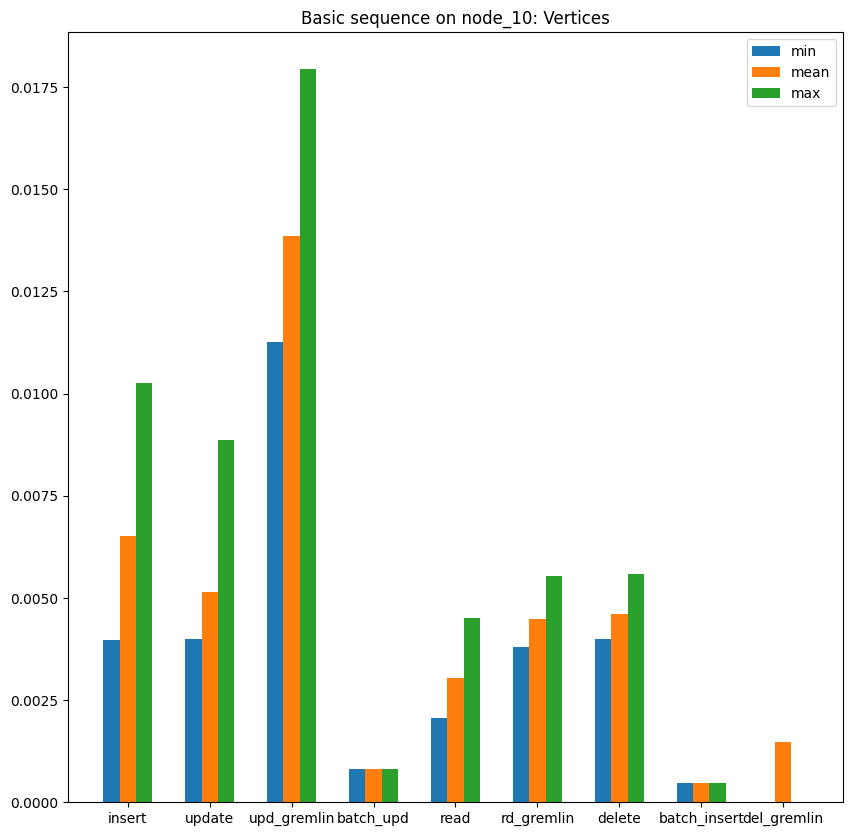

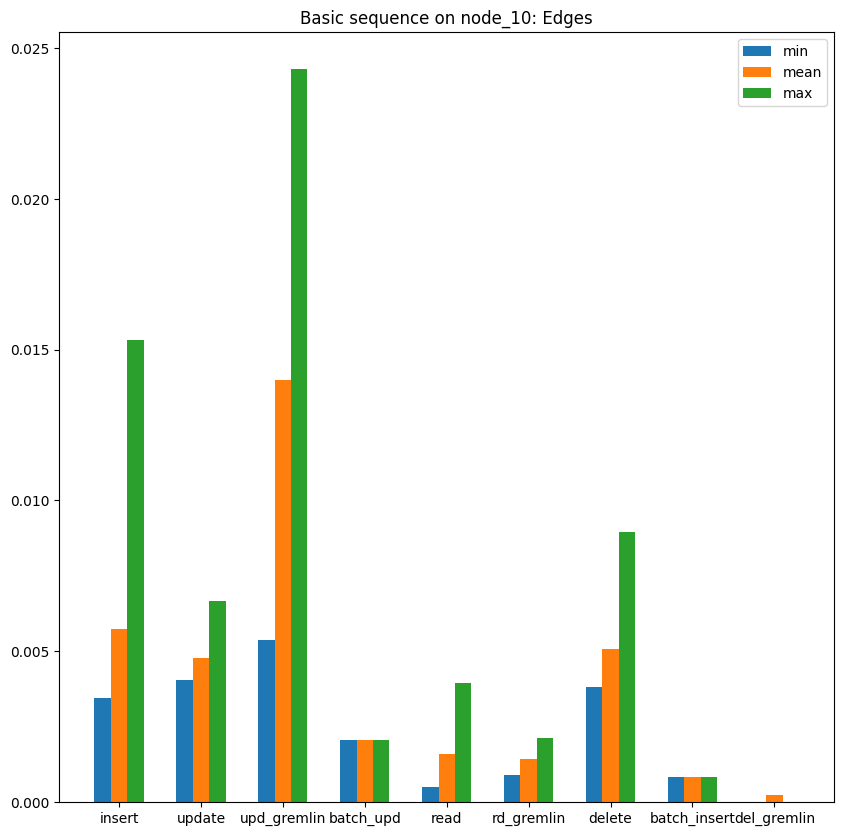

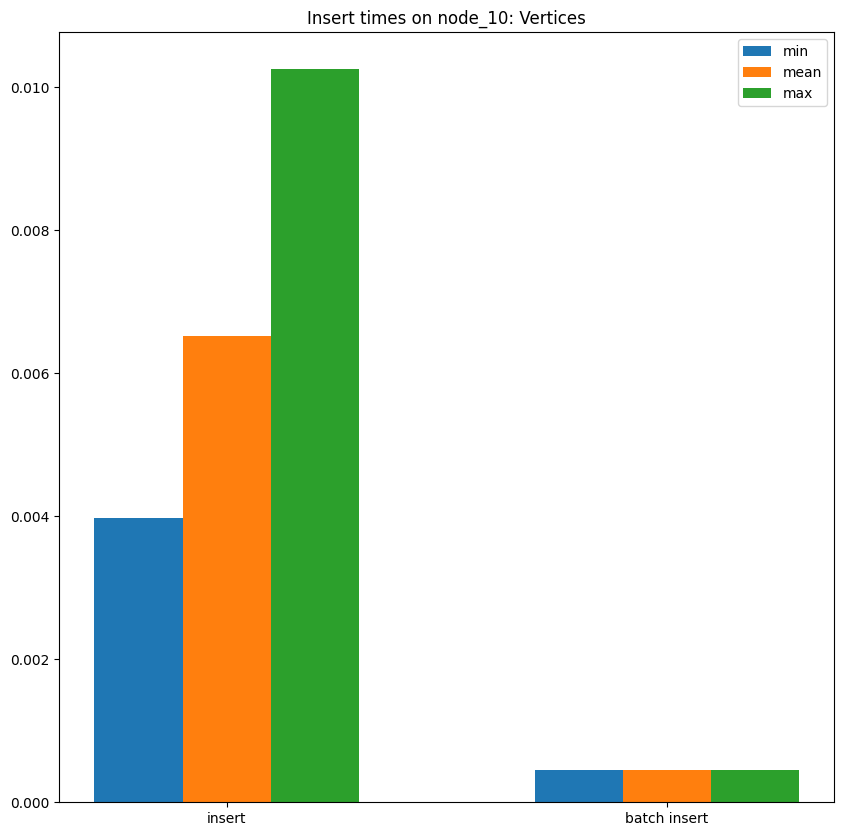

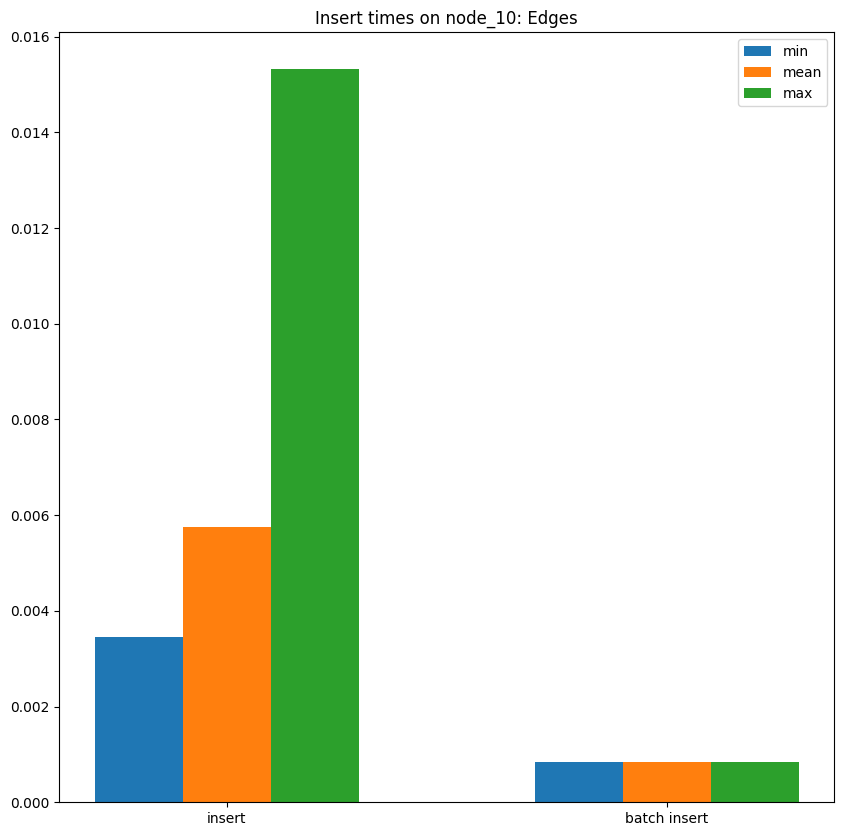

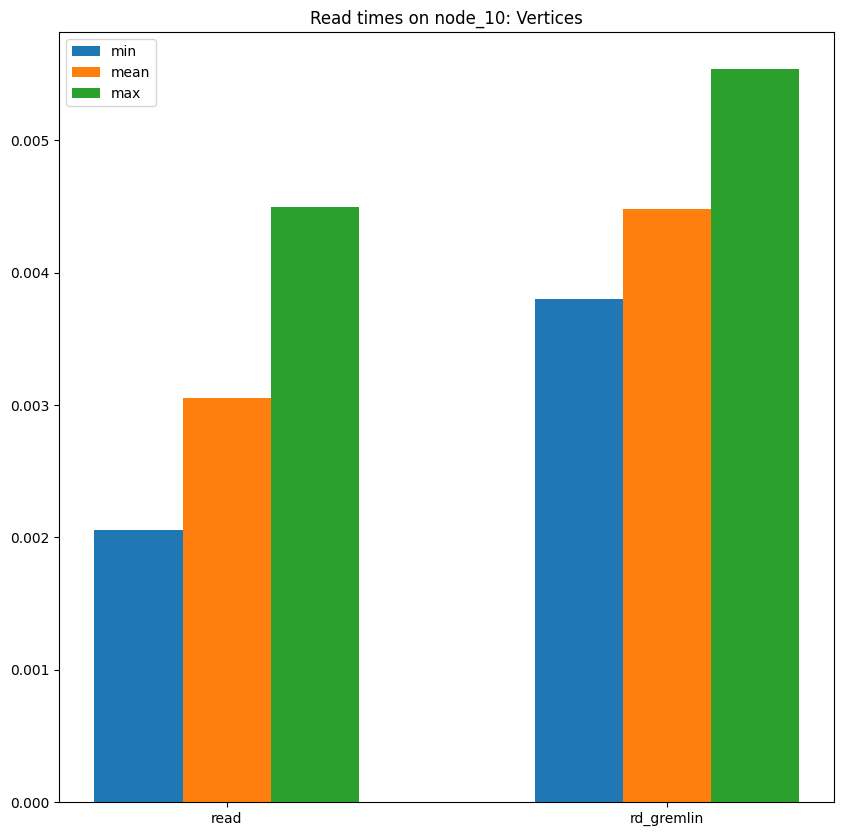

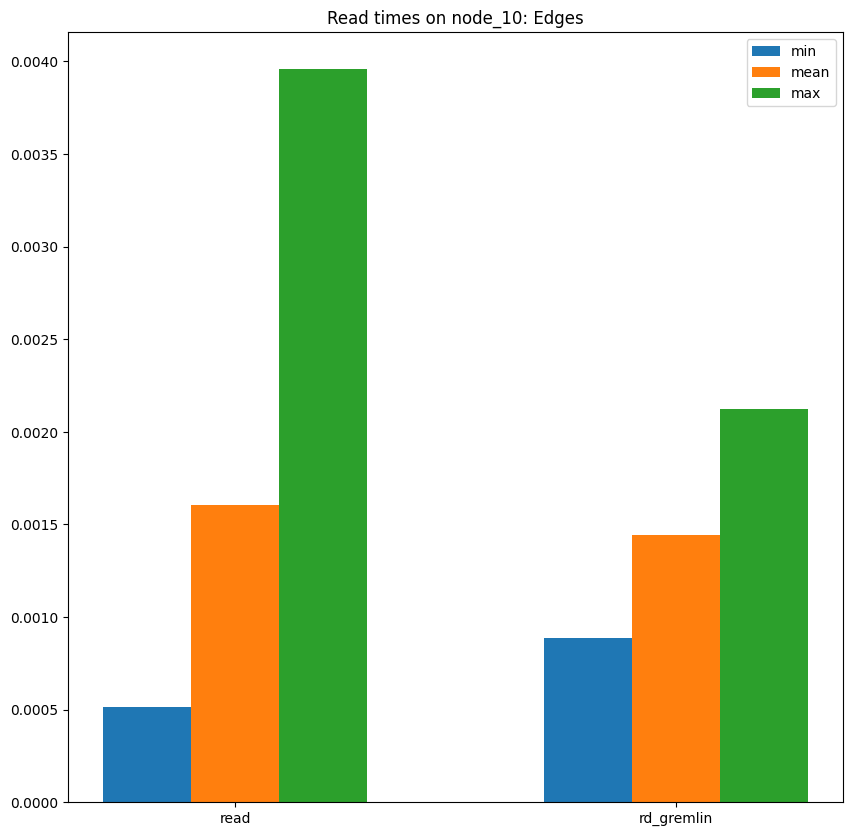

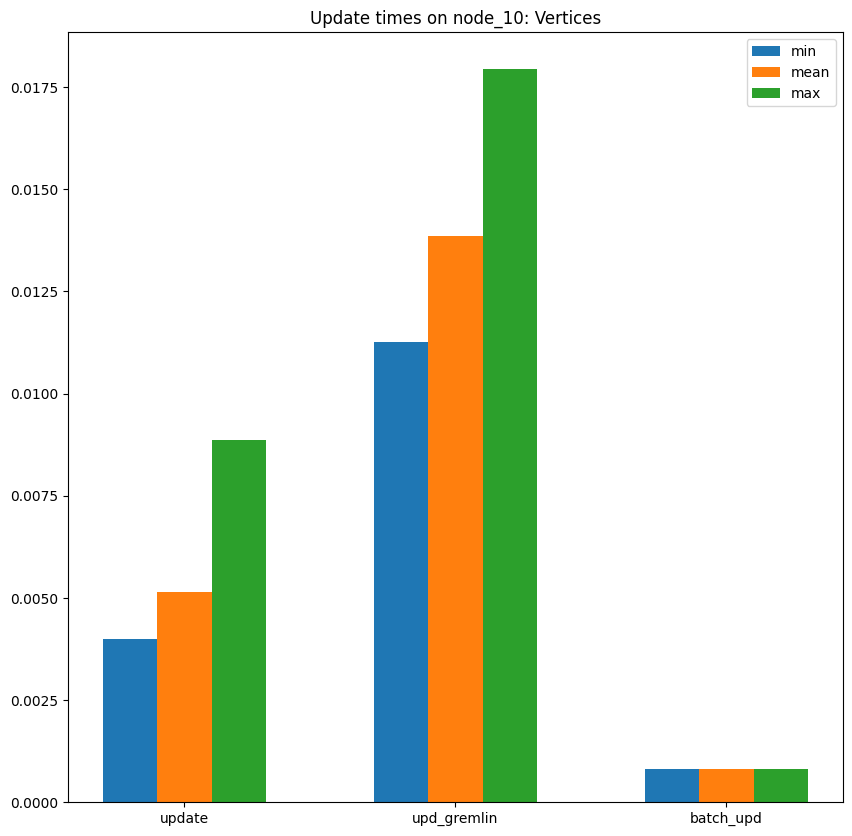

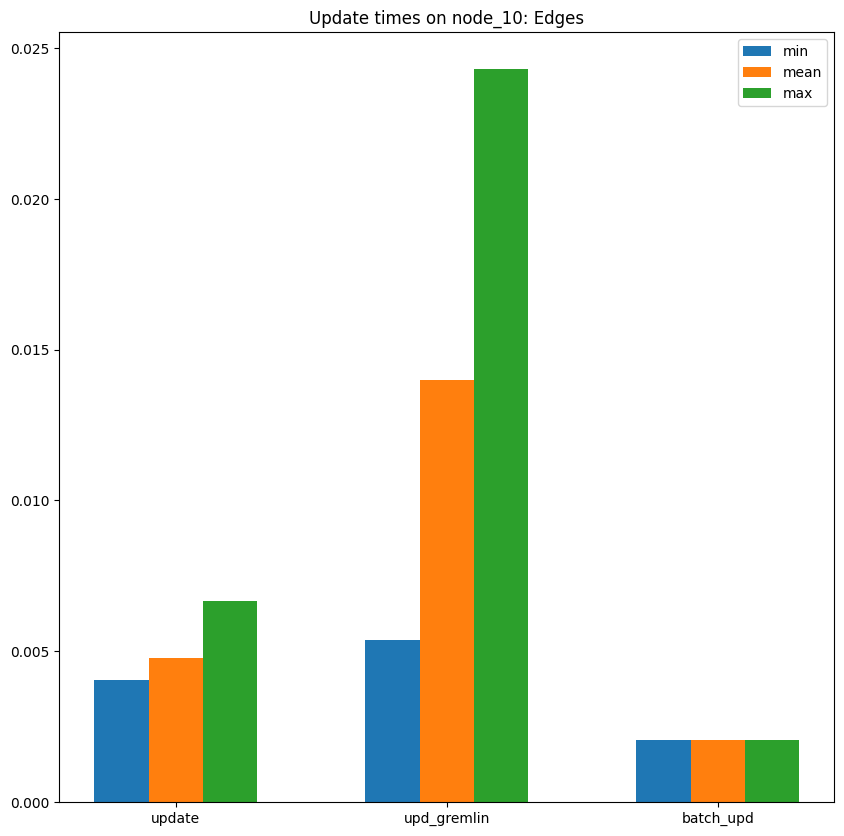

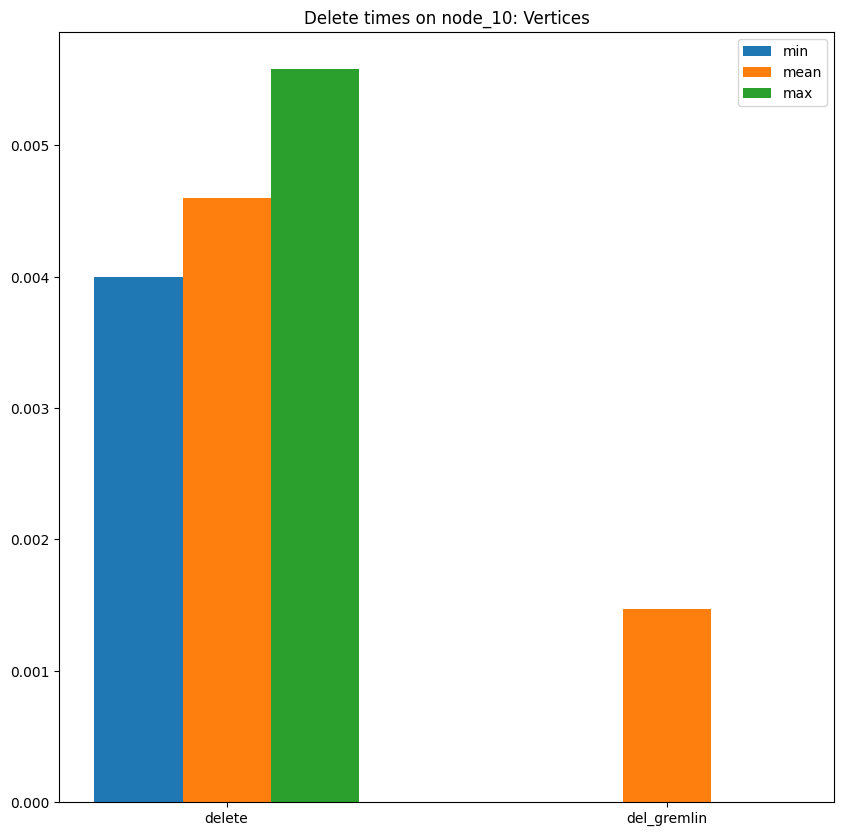

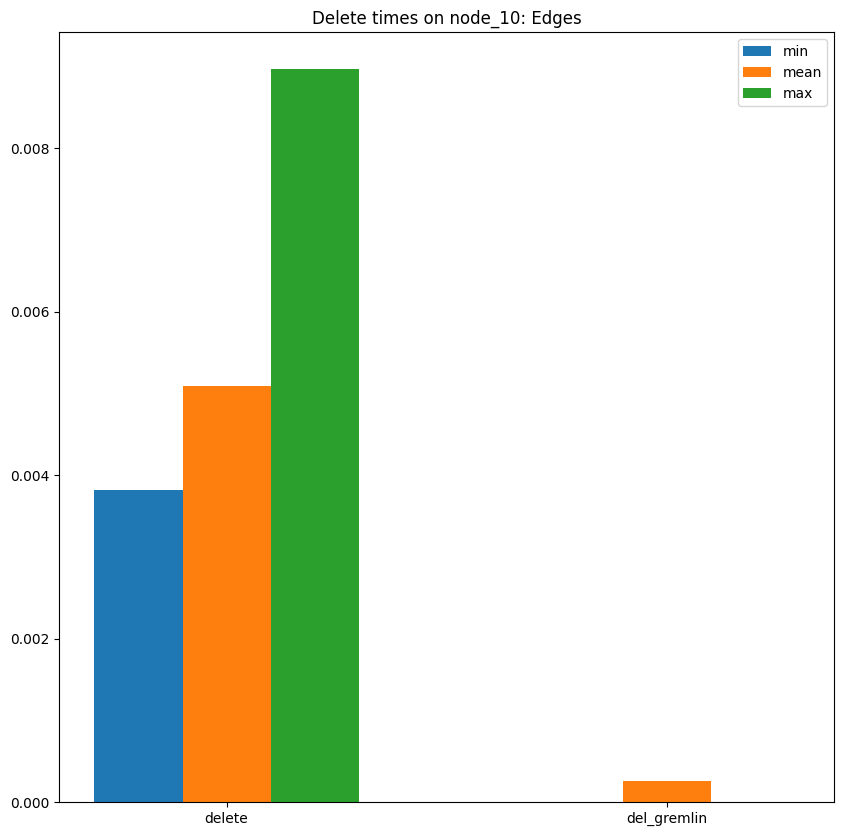

db: node_10
{'insert': {'vertices': {'mean': 0.00651853084564209, 'max': 0.010254383087158203, 'min': 0.003973960876464844, 'number_of_vertices': 10}, 'edges': {'mean': 0.00575484037399292, 'max': 0.015325546264648438, 'min': 0.003457784652709961, 'number_of_edges': 60}, 'total_time': 0.4113888740539551}, 'update': {'edges': {'mean': 0.004793413480122884, 'max': 0.00667262077331543, 'min': 0.00405430793762207, 'total_time': 0.3298482894897461}, 'vertices': {'mean': 0.005154466629028321, 'max': 0.00885629653930664, 'min': 0.003987550735473633, 'total_time': 0.05172896385192871}}, 'update_gremlin': {'edges': {'edges_updated': 60, 'min': 0.005383014678955078, 'max': 0.024311542510986328, 'mean': 0.014002641042073568, 'total_time': 0.9020423889160156}, 'vertices': {'min': 0.011260747909545898, 'max': 0.017948150634765625, 'mean': 0.013854265213012695, 'total_time': 0.1386716365814209}}, 'batch_update': {'vertices': {'max': 0.0008223295211791992, 'min': 0.0008223295211791992, 'mean': 0.0008

In [26]:
results = {}

results["node_10"] = execute_database("node_10", large=False)
print("db:", "node_10")
print(results["node_10"])

tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 58.83it/s]


length = 602


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 82.71it/s]


length = 602


tqdm() Progress Bar: 100%|██████████| 3/3 [00:00<00:00, 11.46it/s]


{'requestId': '5a55e6b1-70cd-459b-a6b0-46564b766a60', 'status': {'message': '', 'code': 200, 'attributes': {}}, 'result': {'data': [], 'meta': {}}}


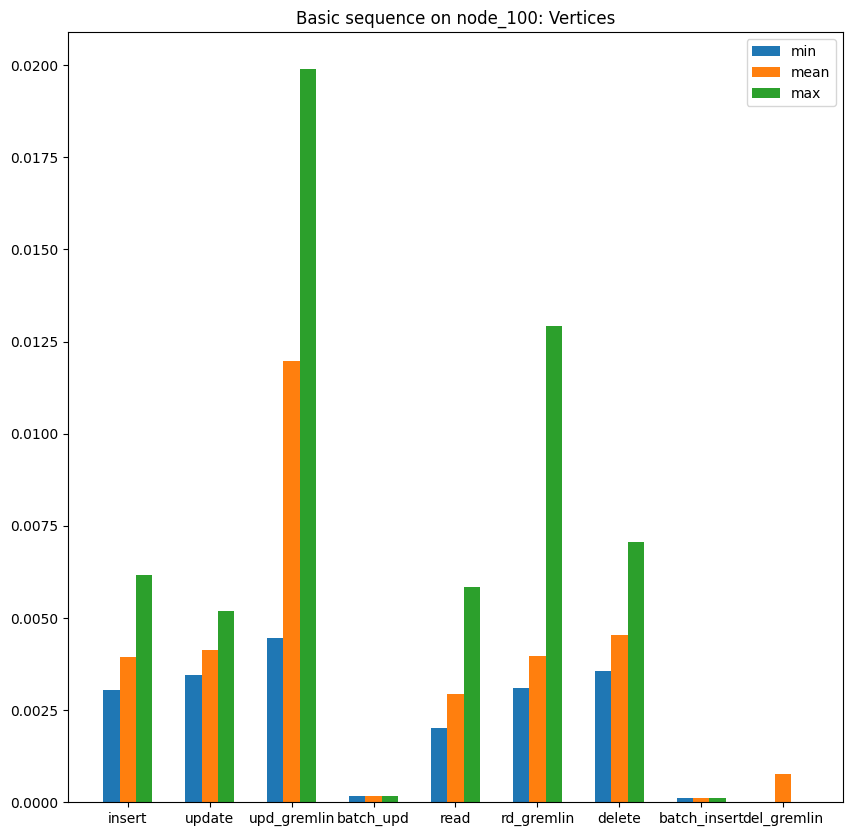

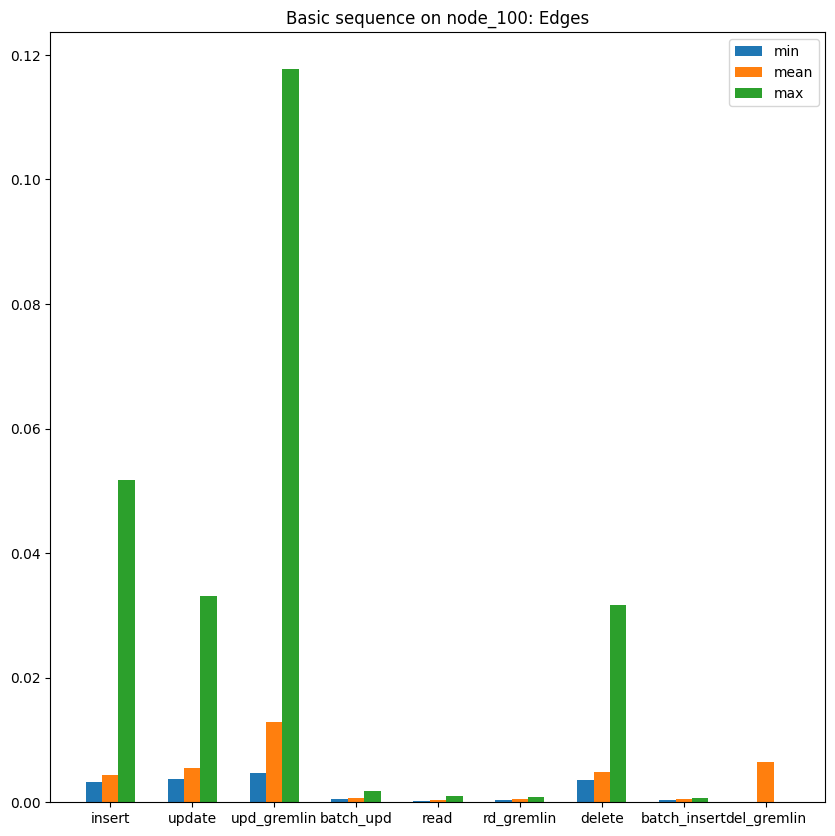

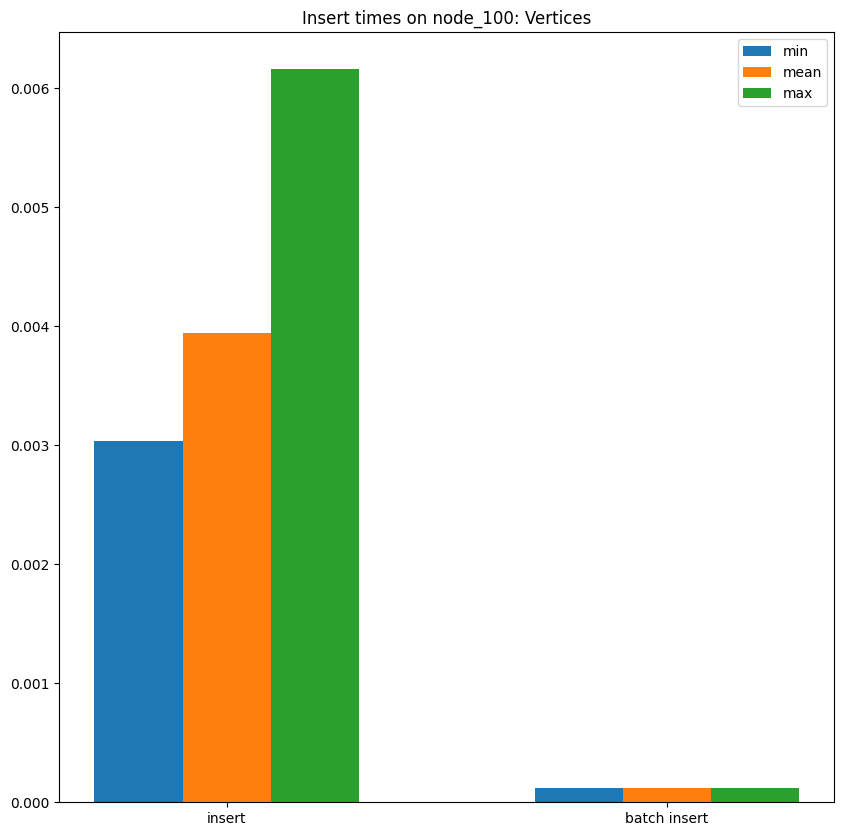

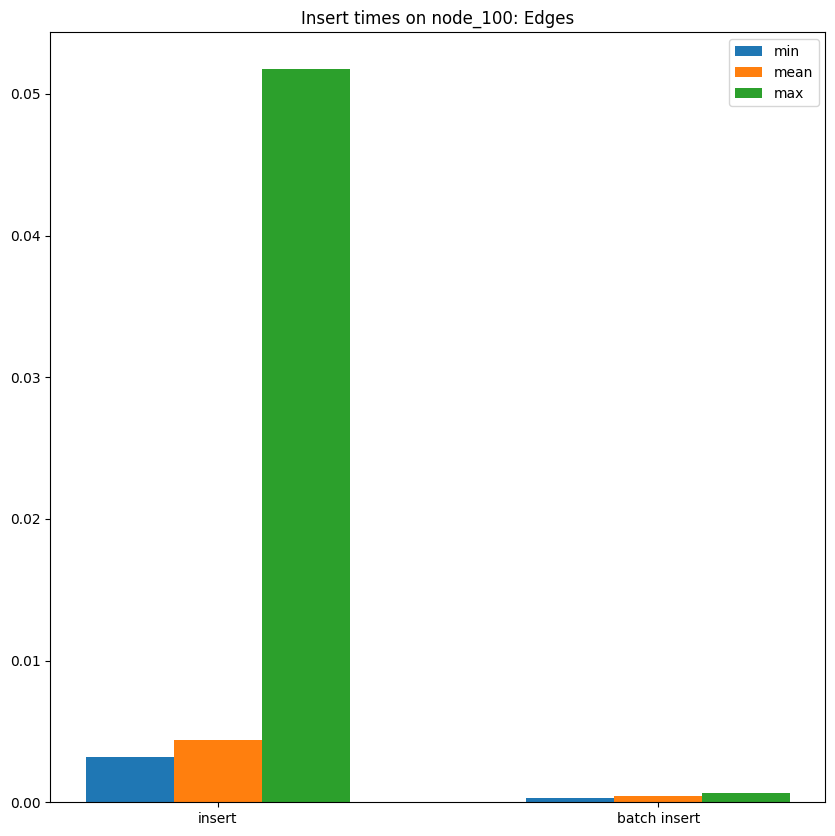

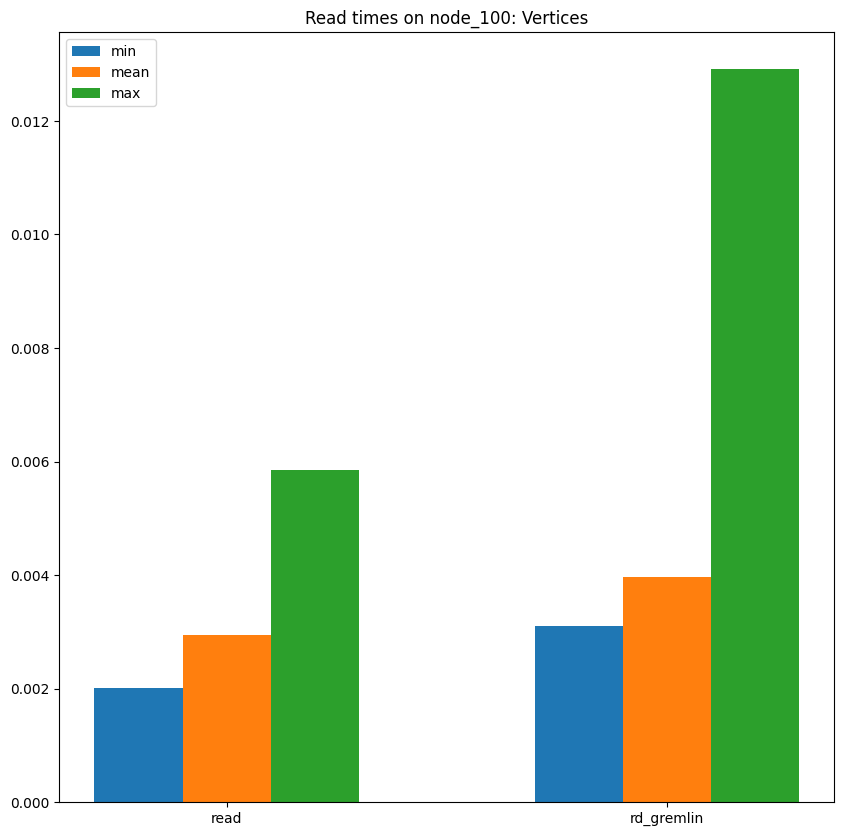

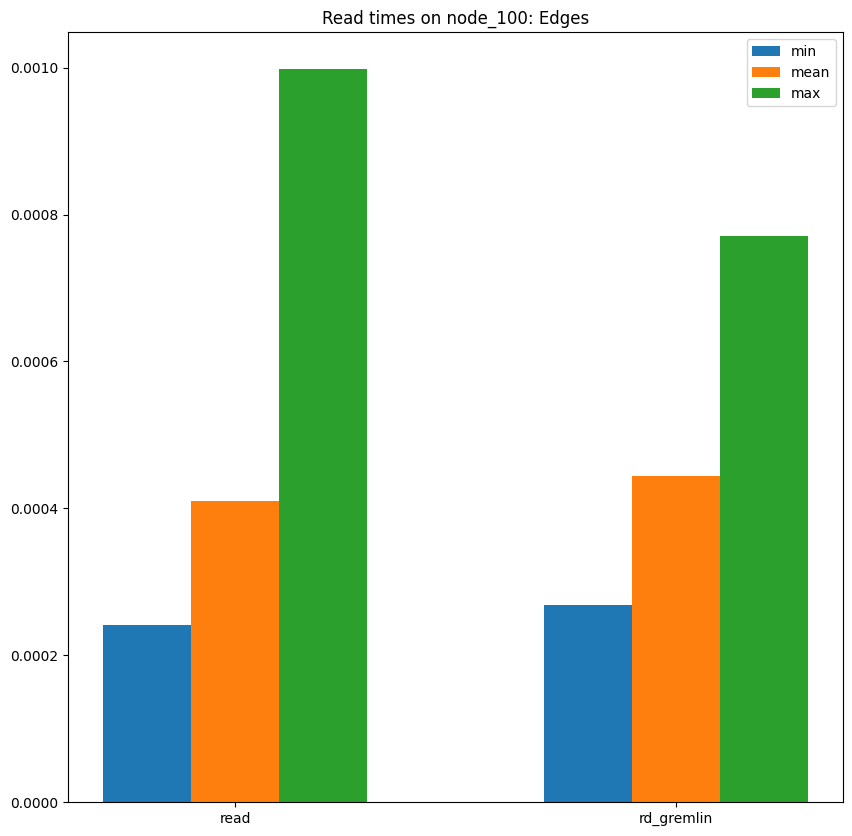

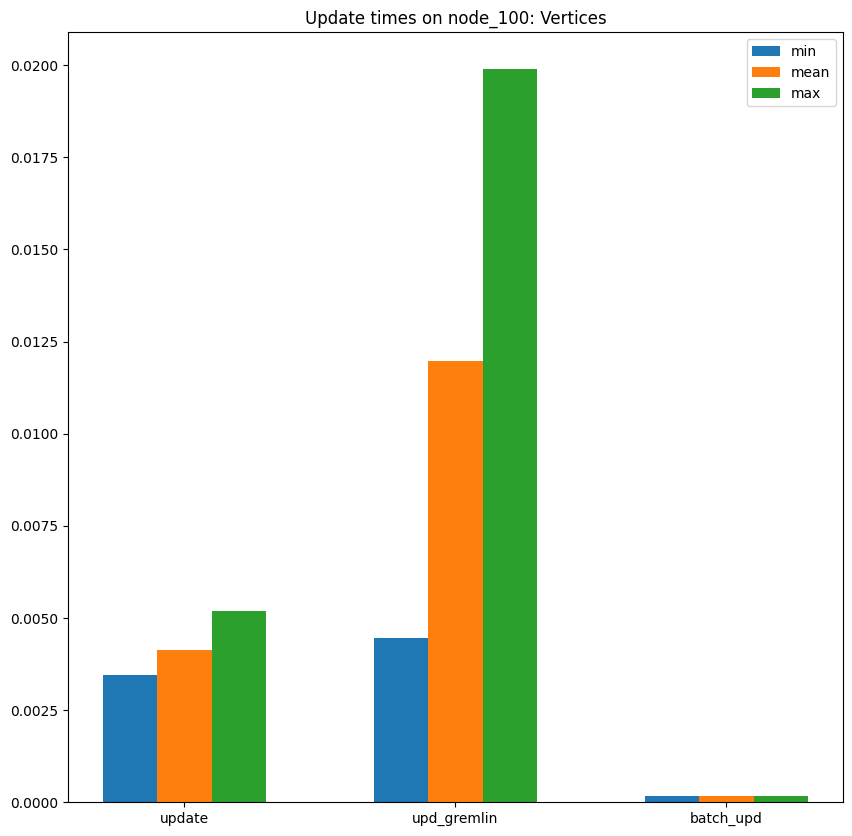

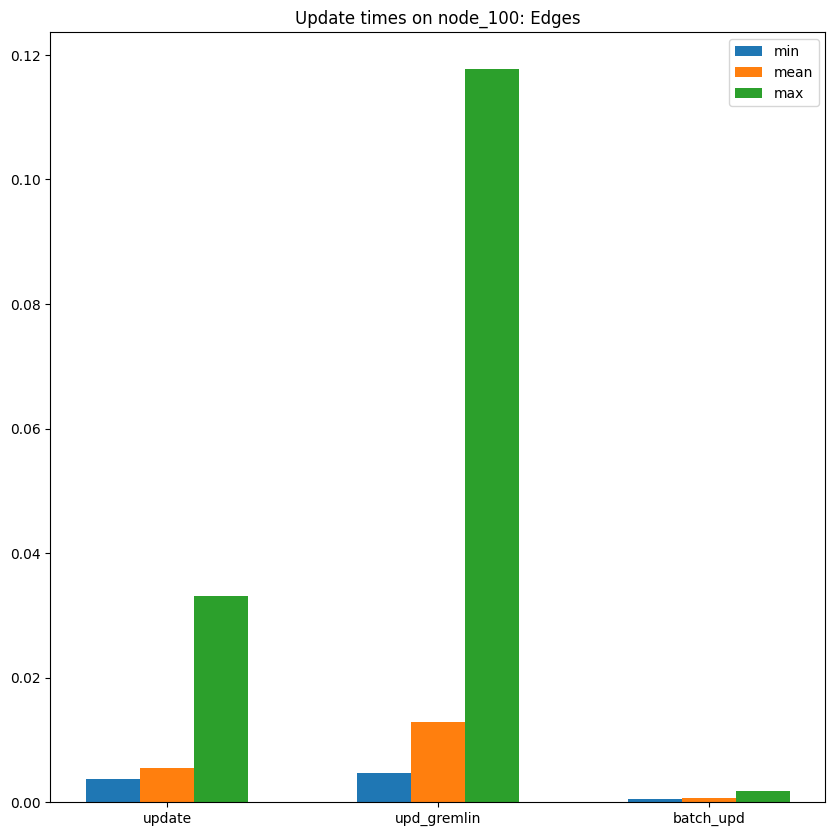

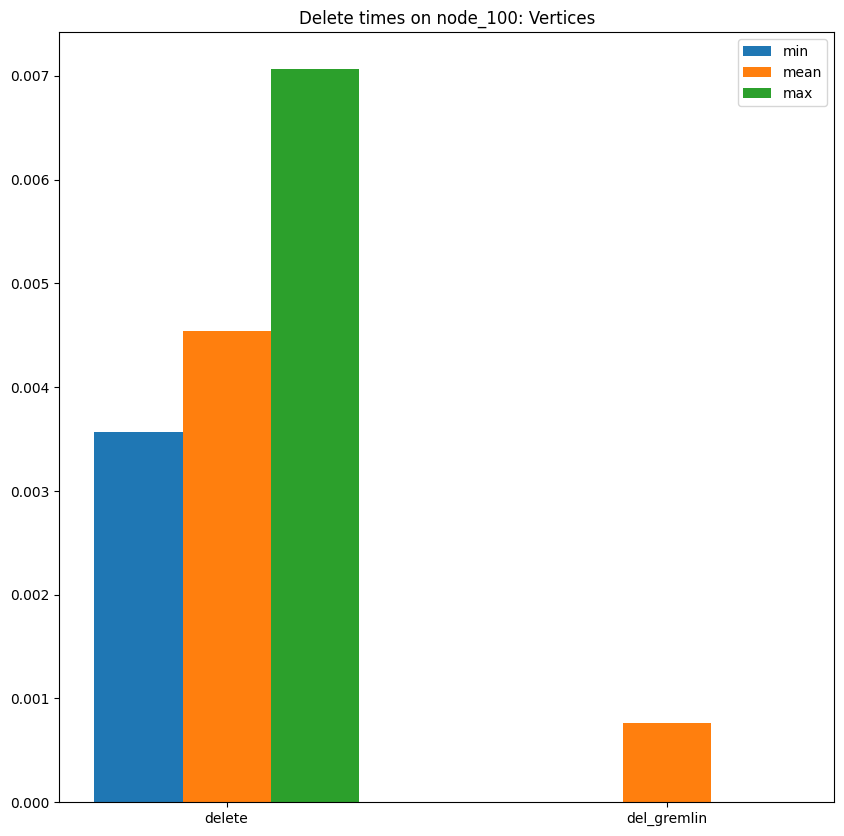

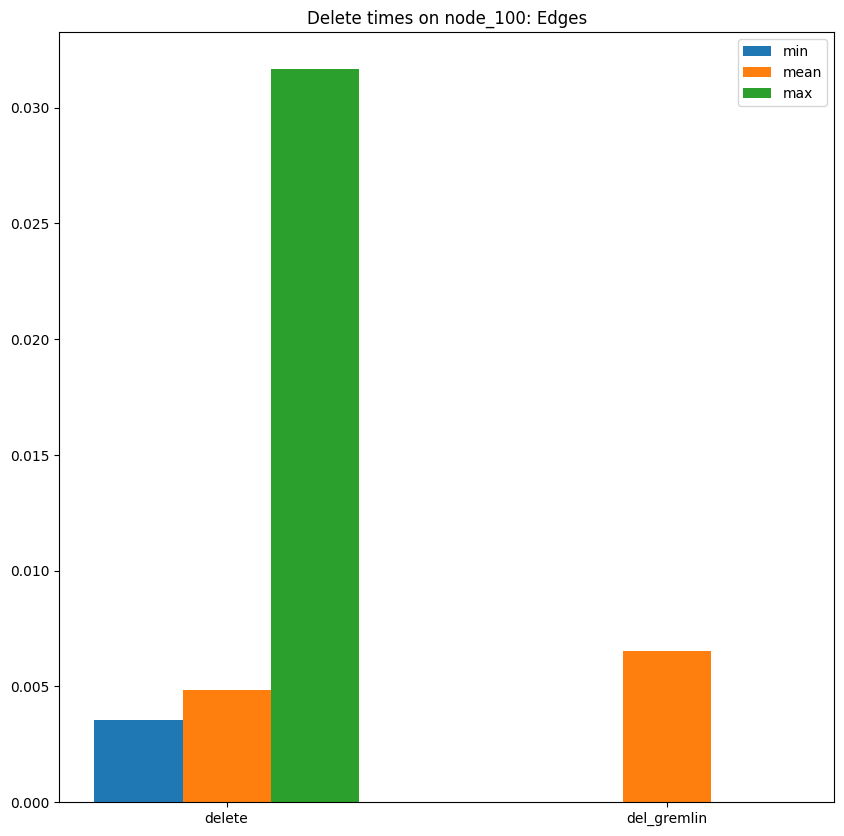

db: node_100
{'insert': {'vertices': {'mean': 0.0039419341087341304, 'max': 0.006161689758300781, 'min': 0.0030319690704345703, 'number_of_vertices': 100}, 'edges': {'mean': 0.004391834338506062, 'max': 0.05176138877868652, 'min': 0.0031659603118896484, 'number_of_edges': 1200}, 'total_time': 5.678661823272705}, 'update': {'edges': {'mean': 0.00547920008500417, 'max': 0.033039093017578125, 'min': 0.0036916732788085938, 'total_time': 7.090645790100098}, 'vertices': {'mean': 0.004128518104553222, 'max': 0.005190849304199219, 'min': 0.003458738327026367, 'total_time': 0.4140157699584961}}, 'update_gremlin': {'edges': {'edges_updated': 1200, 'min': 0.004712581634521484, 'max': 0.11776590347290039, 'mean': 0.012900060216585796, 'total_time': 16.071239471435547}, 'vertices': {'min': 0.004462718963623047, 'max': 0.019901514053344727, 'mean': 0.011965029239654541, 'total_time': 1.1976556777954102}}, 'batch_update': {'vertices': {'max': 0.0001624011993408203, 'min': 0.0001624011993408203, 'mean

In [27]:
results = {}

results["node_100"] = execute_database("node_100", large=False)
print("db:", "node_100")
print(results["node_100"])

tqdm() Progress Bar: 100%|██████████| 5/5 [00:00<00:00, 31.27it/s]


length = 59589


tqdm() Progress Bar: 100%|██████████| 5/5 [00:00<00:00, 52.02it/s]


length = 59589


tqdm() Progress Bar: 100%|██████████| 298/298 [00:21<00:00, 13.88it/s]


{'requestId': '44d645a6-2b3f-48b4-9e34-6b1cdb839c59', 'status': {'message': '', 'code': 200, 'attributes': {}}, 'result': {'data': [], 'meta': {}}}


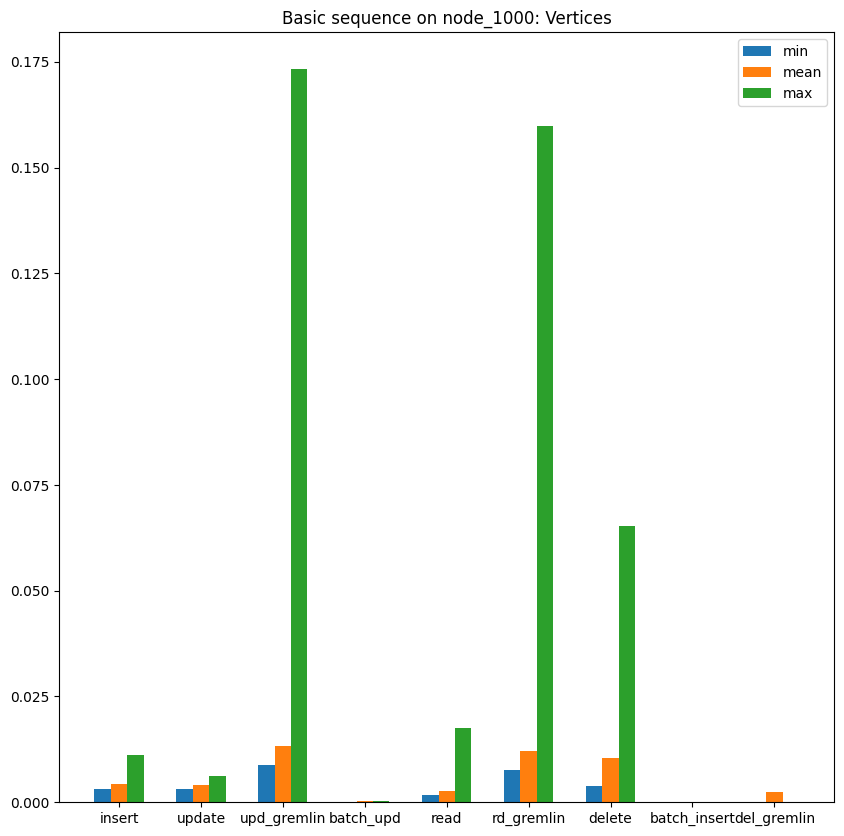

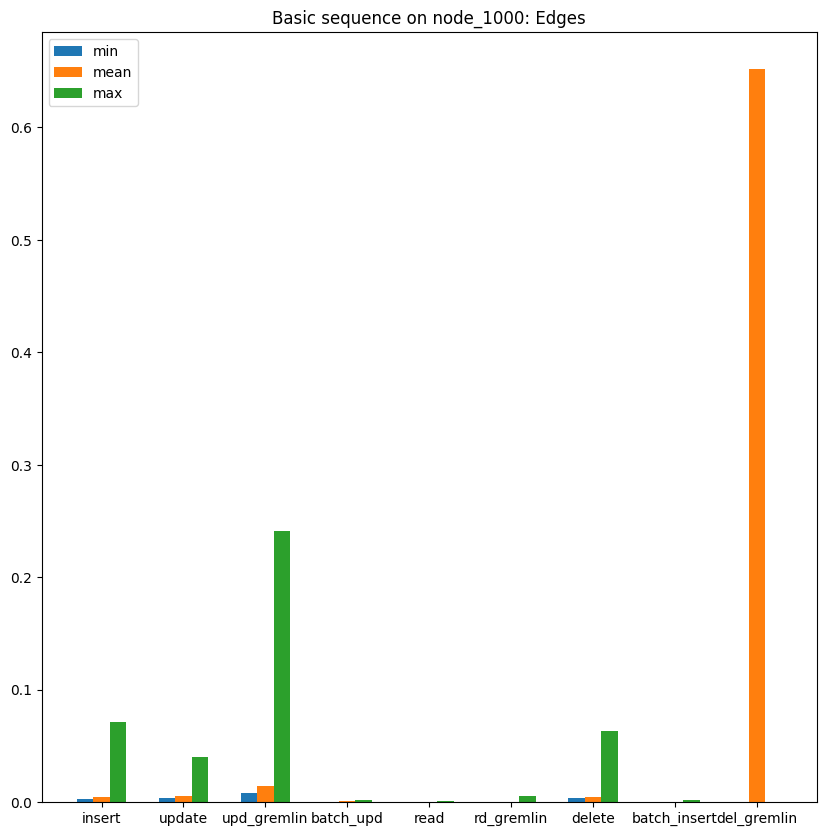

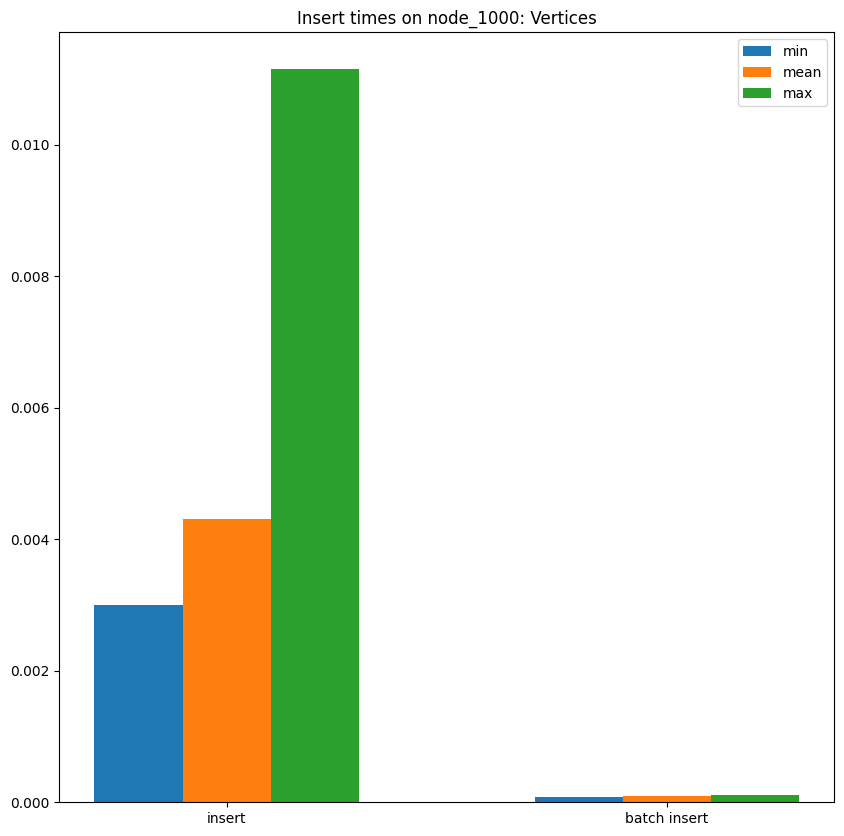

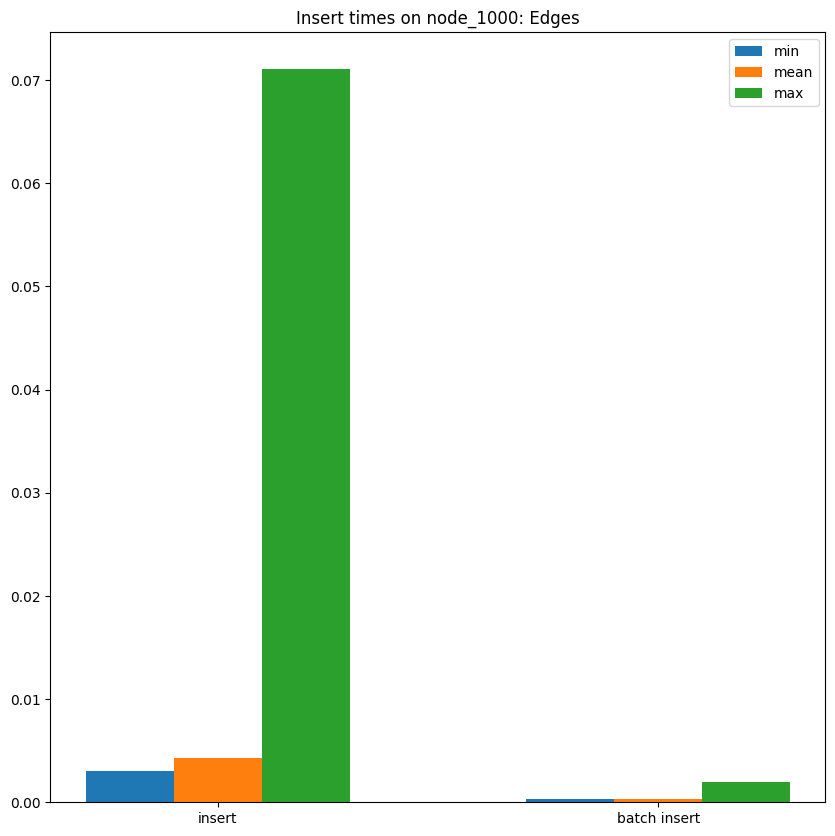

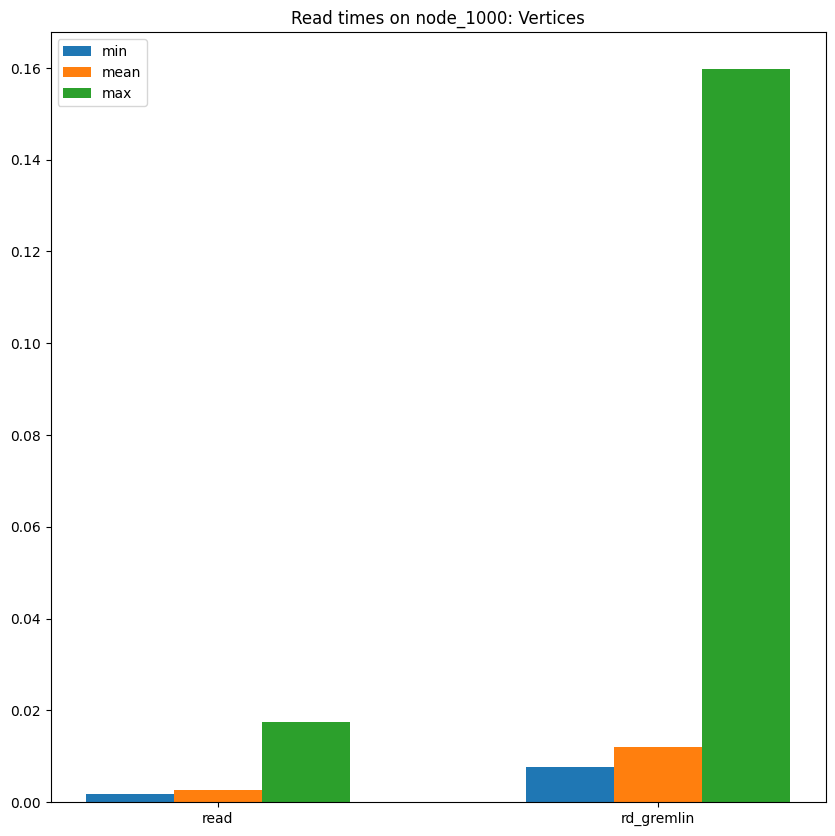

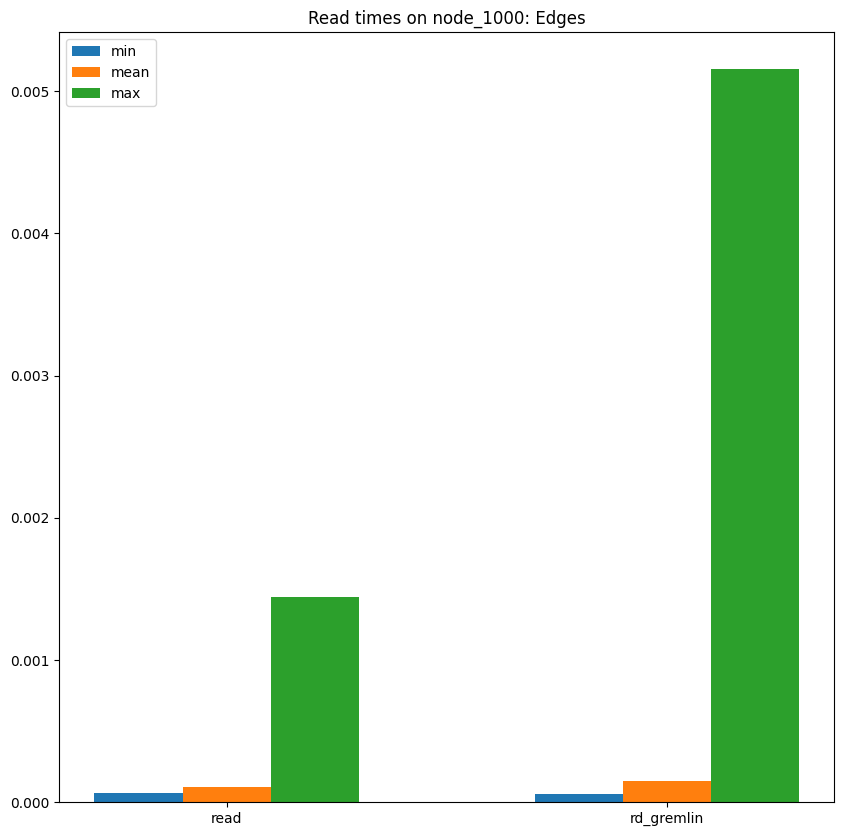

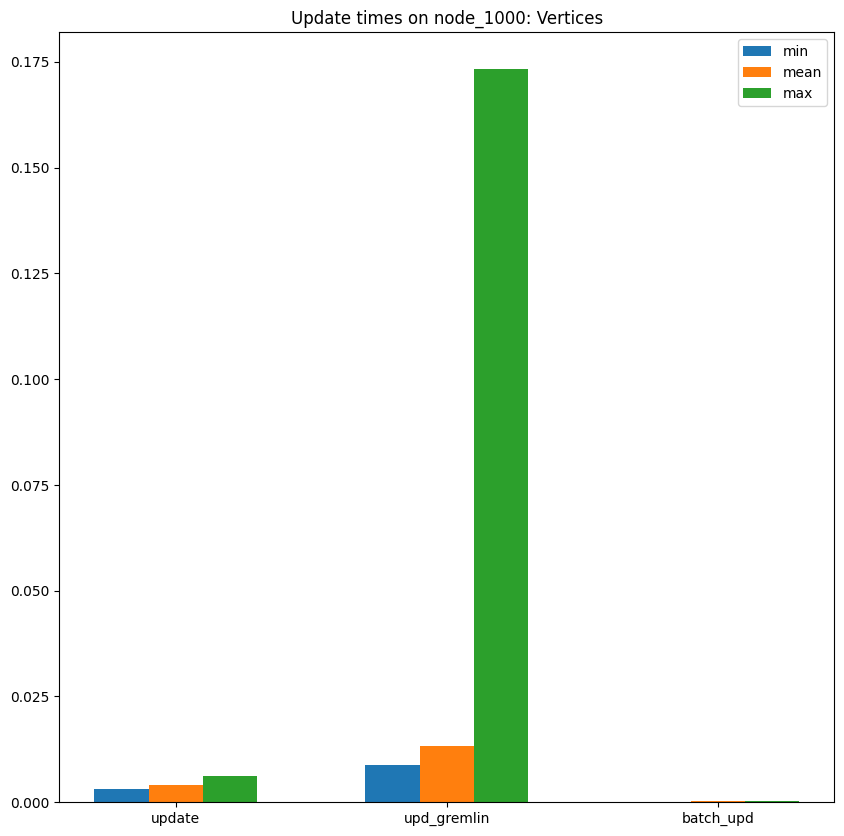

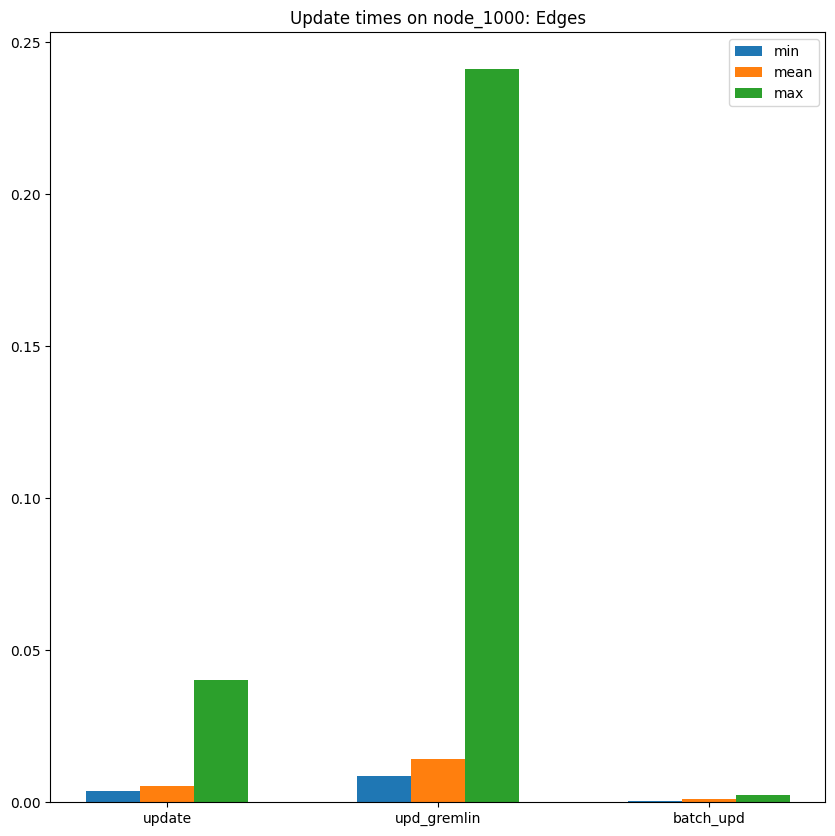

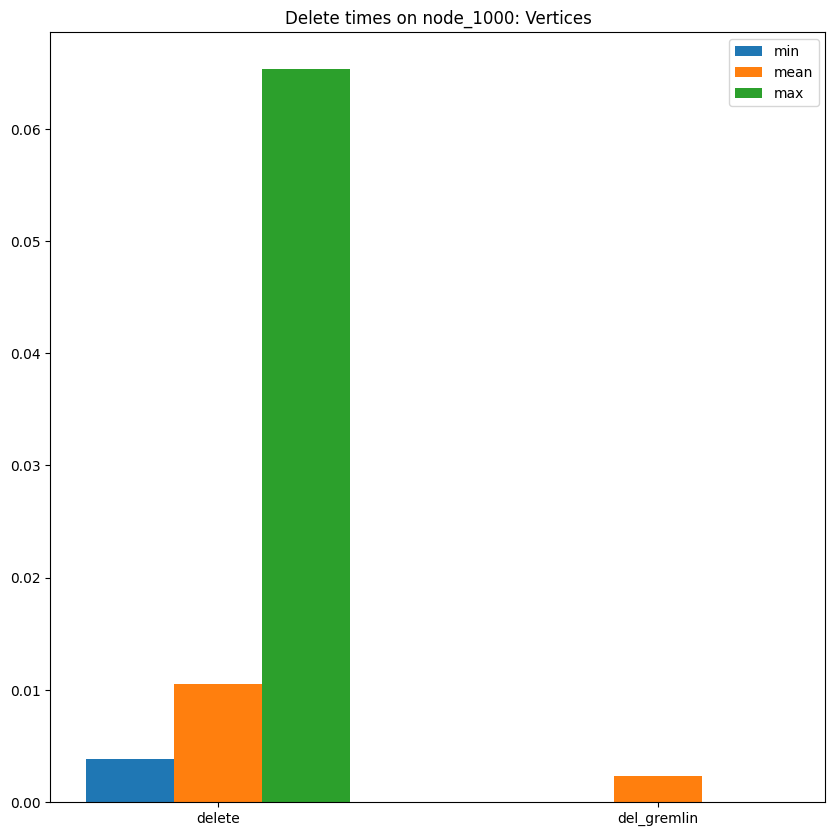

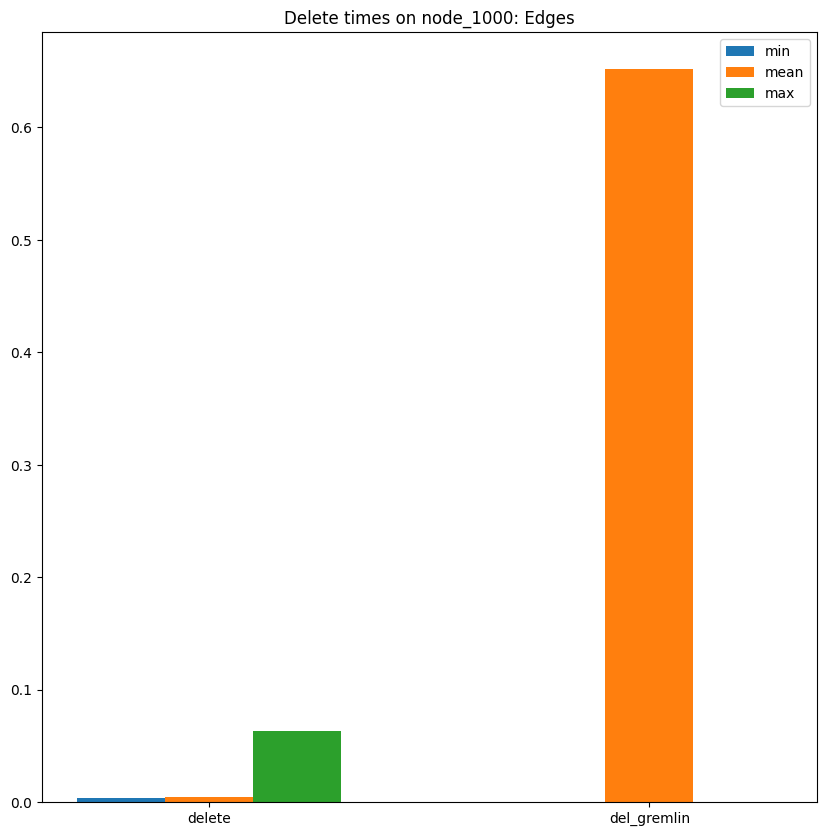

db: node_1000
{'insert': {'vertices': {'mean': 0.004307315304324582, 'max': 0.011154890060424805, 'min': 0.002999544143676758, 'number_of_vertices': 1001}, 'edges': {'mean': 0.0043088009092293895, 'max': 0.07108688354492188, 'min': 0.002996206283569336, 'number_of_edges': 119174}, 'total_time': 519.1437721252441}, 'update': {'edges': {'mean': 0.005255276611360904, 'max': 0.04003548622131348, 'min': 0.003720998764038086, 'total_time': 455.1791331768036}, 'vertices': {'mean': 0.004089536190032959, 'max': 0.006208658218383789, 'min': 0.0031099319458007812, 'total_time': 4.1019675731658936}}, 'update_gremlin': {'edges': {'edges_updated': 111985, 'min': 0.00853872299194336, 'max': 0.2412855625152588, 'mean': 0.014209593533032513, 'total_time': 1611.8944816589355}, 'vertices': {'min': 0.008722066879272461, 'max': 0.1733384132385254, 'mean': 0.013321175813674927, 'total_time': 13.333476781845093}}, 'batch_update': {'vertices': {'max': 0.00017480969429016114, 'min': 0.0001414644718170166, 'mea

In [28]:
results = {}

results["node_1000"] = execute_database("node_1000", large=False)
print("db:", "node_1000")
print(results["node_1000"])

tqdm() Progress Bar: 100%|██████████| 50/50 [00:01<00:00, 40.53it/s]


length = 362894


tqdm() Progress Bar: 100%|██████████| 50/50 [00:01<00:00, 44.24it/s]


length = 362894


tqdm() Progress Bar: 100%|██████████| 3666/3666 [08:36<00:00,  7.10it/s]


BOTH
15 BOTH
[{'id': 'S1:23>1>>S1:902', 'label': 'relationship', 'type': 'edge', 'outV': '1:23', 'outVLabel': 'person', 'inV': '1:902', 'inVLabel': 'person', 'properties': {'strong': 10, 'FromTo': '23 -> 902'}}, {'id': 'S1:23>1>>S1:1649', 'label': 'relationship', 'type': 'edge', 'outV': '1:23', 'outVLabel': 'person', 'inV': '1:1649', 'inVLabel': 'person', 'properties': {'strong': 9, 'FromTo': '23 -> 1649'}}, {'id': 'S1:23>1>>S1:1859', 'label': 'relationship', 'type': 'edge', 'outV': '1:23', 'outVLabel': 'person', 'inV': '1:1859', 'inVLabel': 'person', 'properties': {'strong': 6, 'FromTo': '23 -> 1859'}}, {'id': 'S1:23>1>>S1:2521', 'label': 'relationship', 'type': 'edge', 'outV': '1:23', 'outVLabel': 'person', 'inV': '1:2521', 'inVLabel': 'person', 'properties': {'strong': 8, 'FromTo': '23 -> 2521'}}, {'id': 'S1:23>1>>S1:3789', 'label': 'relationship', 'type': 'edge', 'outV': '1:23', 'outVLabel': 'person', 'inV': '1:3789', 'inVLabel': 'person', 'properties': {'strong': 1, 'FromTo': '23 

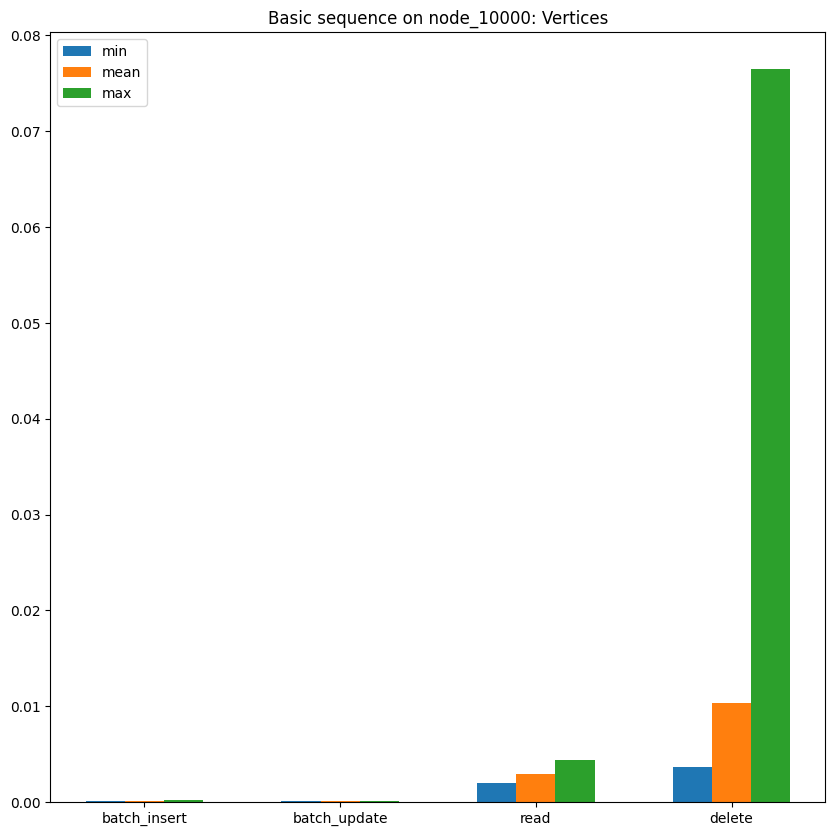

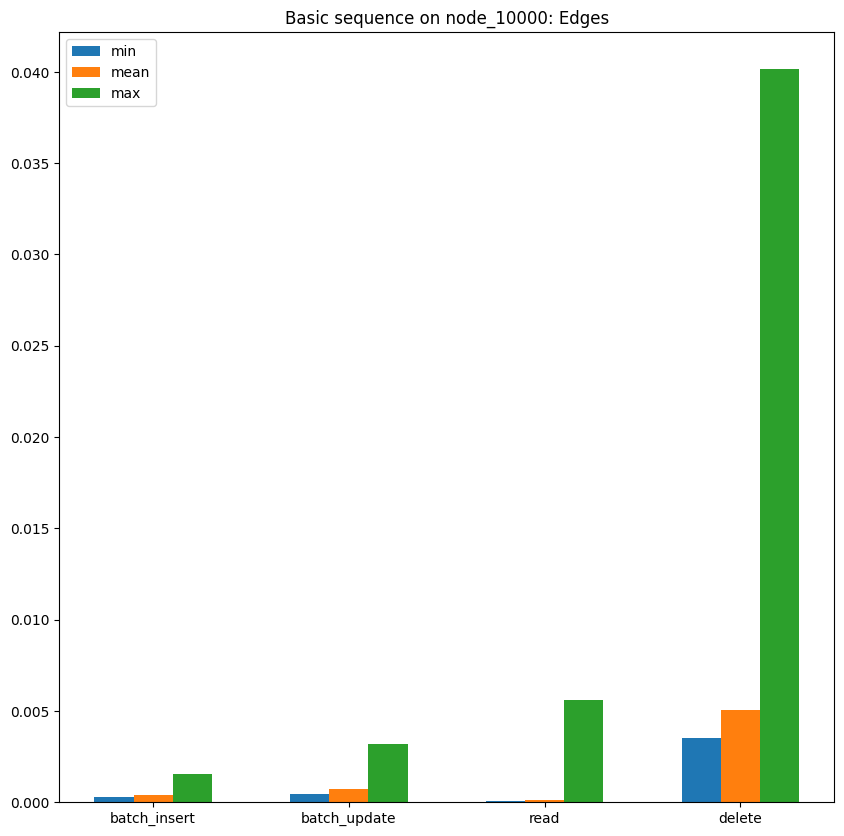

db: node_10000
{'batch insert': {'vertices': {'max': 0.0002731633186340332, 'min': 8.315443992614746e-05, 'mean': 0.00012057616710662841}, 'edges': {'max': 0.0015156257152557373, 'min': 0.0002837491035461426, 'mean': 0.0004083902419336786}}, 'batch update': {'vertices': {'max': 0.00015779852867126465, 'min': 9.302854537963867e-05, 'mean': 0.00011045217514038086}, 'edges': {'max': 0.0031834042072296145, 'min': 0.0004558968544006348, 'mean': 0.0006978604925255437}}, 'read': {'edges': {'mean': 0.00012519705450488762, 'max': 0.005589723587036133, 'min': 7.459878921508789e-05, 'total_time': 0.7137391567230225}, 'vertices': {'mean': 0.002890615463256836, 'max': 0.004441738128662109, 'min': 0.0020341873168945312, 'total_time': 0.28951215744018555}}, 'delete': {'edges': {'mean': 0.005062452898870498, 'max': 0.040164947509765625, 'min': 0.0035135746002197266, 'total_time': 58.98594069480896}, 'vertices': {'mean': 0.010383565425872803, 'max': 0.07652163505554199, 'min': 0.003679513931274414, 'to

In [9]:
results = {}

results["node_10000"] = execute_database("node_10000", large=True)
print("db:", "node_10000")
print(results["node_10000"])

tqdm() Progress Bar: 100%|██████████| 500/500 [00:12<00:00, 40.81it/s]


length = 1414284


tqdm() Progress Bar: 100%|██████████| 500/500 [00:24<00:00, 20.44it/s]


length = 1414284


tqdm() Progress Bar: 100%|██████████| 14286/14286 [40:35<00:00,  5.87it/s] 


BOTH
100 BOTH
[{'id': 'S1:23>1>>S1:36', 'label': 'relationship', 'type': 'edge', 'outV': '1:23', 'outVLabel': 'person', 'inV': '1:36', 'inVLabel': 'person', 'properties': {'strong': 5, 'FromTo': '23 -> 36'}}, {'id': 'S1:23>1>>S1:81', 'label': 'relationship', 'type': 'edge', 'outV': '1:23', 'outVLabel': 'person', 'inV': '1:81', 'inVLabel': 'person', 'properties': {'strong': 3, 'FromTo': '23 -> 81'}}, {'id': 'S1:23>1>>S1:84', 'label': 'relationship', 'type': 'edge', 'outV': '1:23', 'outVLabel': 'person', 'inV': '1:84', 'inVLabel': 'person', 'properties': {'strong': 10, 'FromTo': '23 -> 84'}}, {'id': 'S1:23>1>>S1:85', 'label': 'relationship', 'type': 'edge', 'outV': '1:23', 'outVLabel': 'person', 'inV': '1:85', 'inVLabel': 'person', 'properties': {'strong': 1, 'FromTo': '23 -> 85'}}, {'id': 'S1:23>1>>S1:95', 'label': 'relationship', 'type': 'edge', 'outV': '1:23', 'outVLabel': 'person', 'inV': '1:95', 'inVLabel': 'person', 'properties': {'strong': 10, 'FromTo': '23 -> 95'}}, {'id': 'S1:23

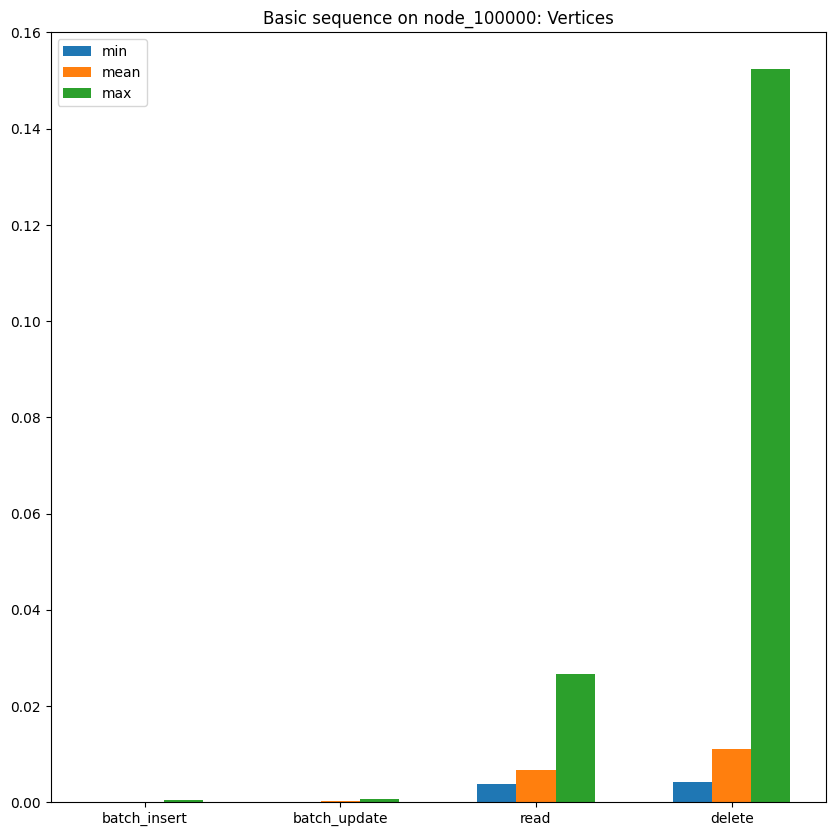

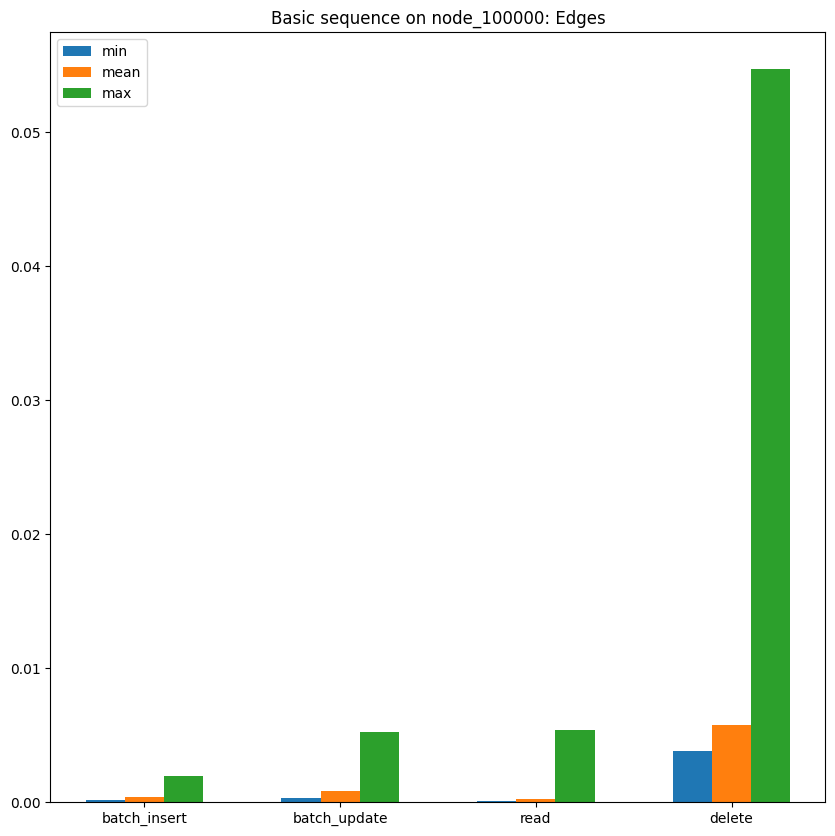

db: node_100000
{'batch insert': {'vertices': {'max': 0.00040132761001586913, 'min': 8.14664363861084e-05, 'mean': 0.0001195385479927063}, 'edges': {'max': 0.0019409847259521484, 'min': 0.00013959884643554687, 'mean': 0.0004169886676087078}}, 'batch update': {'vertices': {'max': 0.0006885623931884766, 'min': 0.00012225031852722168, 'mean': 0.00023884794235229492}, 'edges': {'max': 0.005206944942474365, 'min': 0.00032478690147399905, 'mean': 0.0008423997103057494}}, 'read': {'edges': {'mean': 0.0002623406156364739, 'max': 0.005385160446166992, 'min': 0.00010427614537681022, 'total_time': 1.123683214187622}, 'vertices': {'mean': 0.00660592794418335, 'max': 0.026589155197143555, 'min': 0.003820180892944336, 'total_time': 0.6612093448638916}}, 'delete': {'edges': {'mean': 0.005745203613971251, 'max': 0.05473804473876953, 'min': 0.003788471221923828, 'total_time': 48.78689241409302}, 'vertices': {'mean': 0.011138629913330079, 'max': 0.15244054794311523, 'min': 0.004166603088378906, 'total_t

In [8]:
results = {}

results["node_100000"] = execute_database("node_100000", large=True)
print("db:", "node_100000")
print(results["node_100000"])

In [7]:
results = {}

results["node_1000000"] = execute_database("node_1000000", large=True)
print("db:", "node_1000000")
print(results["node_1000000"])

tqdm() Progress Bar: 100%|██████████| 5000/5000 [01:45<00:00, 47.54it/s]


length = 23667394


tqdm() Progress Bar:  91%|█████████ | 107575/118337 [3:09:49<19:43,  9.09it/s]  

In [ ]:
results

{'node_10': {'insert': {'vertices': {'mean': 0.002852463722229004,
    'max': 0.004044055938720703,
    'min': 0.0020825862884521484,
    'number_of_vertices': 10},
   'edges': {'mean': 0.0029212156931559246,
    'max': 0.00680088996887207,
    'min': 0.002075672149658203,
    'number_of_edges': 60},
   'total_time': 0.20430517196655273},
  'update': {'edges': {'mean': 0.003345354398091634,
    'max': 0.008148431777954102,
    'min': 0.002608776092529297,
    'total_time': 0.2288200855255127},
   'vertices': {'mean': 0.0020617246627807617,
    'max': 0.0025250911712646484,
    'min': 0.0017611980438232422,
    'total_time': 0.020689010620117188}},
  'update_gremlin': {'edges': {'edges_updated': 60,
    'min': 0.003414154052734375,
    'max': 0.016986608505249023,
    'mean': 0.00644683837890625,
    'total_time': 0.41745615005493164},
   'vertices': {'min': 0.0059261322021484375,
    'max': 0.010348081588745117,
    'mean': 0.006916546821594238,
    'total_time': 0.06925272941589355}},

In [ ]:
def execute_traverser(database):
    hg = PyHugeGraphClient.HugeGraphClient("http://localhost", "8081", database)
    
    time = []

    time.append(traversers.traverser_shortest_path(hg, source="1:1", target="1:5", max_depth=10000))
    time.append(traversers.traverser_kout(hg, source="1:1", max_depth=5))
    time.append(traversers.traverser_kneighbor(hg, source="1:1", max_depth=10))
        
    x_labels = ["Shortest Path", "Kout", "Kneighbor"]

    X_axis = np.arange(len(x_labels))*2
    
    plt.figure(figsize=(10,10))
    title = "Traversers timing"
    plt.title(title)

    plt.xticks(X_axis, x_labels) #, rotation=45
    plt.bar(X_axis, time, 0.4)
    
    plt.savefig(my_path + "/plots/" + database + "/" + title + ".png")
    plt.legend()

    
    plt.show()
    return {
        "Shortest Path": time[0],
        "Kout": time[1],
        "Kneighbor": time[2],
    }

In [ ]:
results_traversers = {}

results_traversers["node_10"] = execute_traverser("node_10")
print(results_traversers["node_10"])

In [ ]:
results_traversers["node_100"] = execute_traverser("node_100")
print(results_traversers["node_100"])

In [ ]:
results_traversers["node_1000"] = execute_traverser("node_1000")
print(results_traversers["node_1000"])

In [ ]:
results_traversers["node_10000"] = execute_traverser("node_10000")
print(results_traversers["node_10000"])

In [ ]:
results_traversers["node_100000"] = execute_traverser("node_100000")
print(results_traversers["node_100000"])

In [ ]:
results_traversers["node_1000000"] = execute_traverser("node_1000000")
print(results_traversers["node_1000000"])